## Modélisation et Prévisions

Cette section contient le développement d'un modèle de prévision des revenus journaliers pour chaque modèle de smartphone pour le 1er trimestre 2025.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Variables explicatives et cibles
features = ['marketing_score', 'competition_index', 'customer_satisfaction',
            'purchasing_power_index', 'weather_condition', 'tech_event',
            '5g_phase', 'store_traffic', 'public_transport']

targets = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']

### Modélisation avec Random Forest

In [14]:
# Prétraitement des données
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Gestion des colonnes catégoriques : Encodage avec pd.get_dummies()
data = pd.get_dummies(data, columns=['weather_condition', 'tech_event', '5g_phase', 'public_transport'], drop_first=True)

# Gestion des valeurs manquantes : Remplacement par la moyenne (ou une autre stratégie)
data.fillna(data.mean(), inplace=True)

# Vérification des colonnes disponibles après transformation
features = ['marketing_score', 'competition_index', 'customer_satisfaction',
            'purchasing_power_index', 'store_traffic'] + \
           [col for col in data.columns if col.startswith(('weather_condition_', 'tech_event_', '5g_phase_', 'public_transport_'))]

targets = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']

# Modélisation pour chaque modèle de smartphone
models_predictions = {}

for target in targets:
    print(f"\nModélisation pour : {target}")
    y = data[target].dropna()  # Retirer les valeurs NaN de la cible
    X = data.loc[y.index, features]  # Sélectionner les mêmes indices pour les variables explicatives
    
    # Division en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Modélisation avec RandomForest
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Évaluation des performances
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"RMSE : {rmse:.2f}, MAE : {mae:.2f}")
    
    # Sauvegarder le modèle
    models_predictions[target] = {
        'model': model,
        'rmse': rmse,
        'mae': mae
    }


C:\Users\user\AppData\Local\Temp\ipykernel_12156\2496225139.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)



Modélisation pour : jPhone_Pro_revenue
RMSE : 21255.28, MAE : 13323.72

Modélisation pour : Kaggle_Pixel_5_revenue
RMSE : 9044.99, MAE : 5816.23

Modélisation pour : Planet_SX_revenue
RMSE : 4937.18, MAE : 3292.79


### Prévisions pour le 1er trimestre 2025

In [16]:
# Générer des dates pour janvier à mars 2025
future_dates = pd.date_range(start="2025-01-01", end="2025-03-31")
future_data = pd.DataFrame(index=future_dates)

# Remplir avec des données fictives pour les variables explicatives
future_data[features] = np.random.uniform(0, 1, size=(len(future_dates), len(features)))

# Prévisions
for target in targets:
    future_data[target] = models_predictions[target]['model'].predict(future_data[features])

# Sauvegarde des prévisions
future_data.reset_index(inplace=True)
future_data.rename(columns={'index': 'date'}, inplace=True)
future_data.to_csv('predictions_q1_2025.csv', index=False)
print("Prévisions sauvegardées dans 'predictions_q1_2025.csv'.")

Prévisions sauvegardées dans 'predictions_q1_2025.csv'.


### Visualisation des prévisions

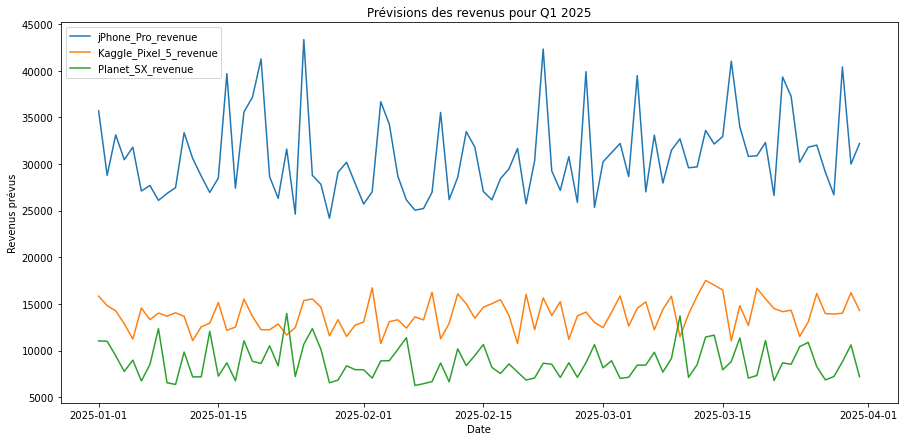

In [17]:
# Visualiser les prévisions
plt.figure(figsize=(15, 7))
for target in targets:
    plt.plot(future_data['date'], future_data[target], label=target)
plt.xlabel('Date')
plt.ylabel('Revenus prévus')
plt.title('Prévisions des revenus pour Q1 2025')
plt.legend()
plt.show()

# Linear Regression-Random Forest-Gradient Boosting-XGBoost

In [18]:

# Importer des modèles supplémentaires
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour entraîner et évaluer plusieurs modèles
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
    }
    
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        results[model_name] = {"RMSE": rmse, "R2": r2}
        print(f"{model_name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")
    return results

# Entraînement et évaluation
results = train_and_evaluate_models(X_train, y_train, X_test, y_test)

# Résultats des modèles
results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression: RMSE = 6652.71, R² = 0.76
Random Forest: RMSE = 4937.18, R² = 0.87
Gradient Boosting: RMSE = 5244.49, R² = 0.85
XGBoost: RMSE = 5199.26, R² = 0.85
                          RMSE        R2
Linear Regression  6652.707367  0.761239
Random Forest      4937.184000  0.868500
Gradient Boosting  5244.487522  0.851621
XGBoost            5199.255102  0.854169
